In [23]:
import tensorflow as tf
from tensorflow.keras import *
import matplotlib.pyplot as plt
import numpy as np

In [24]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

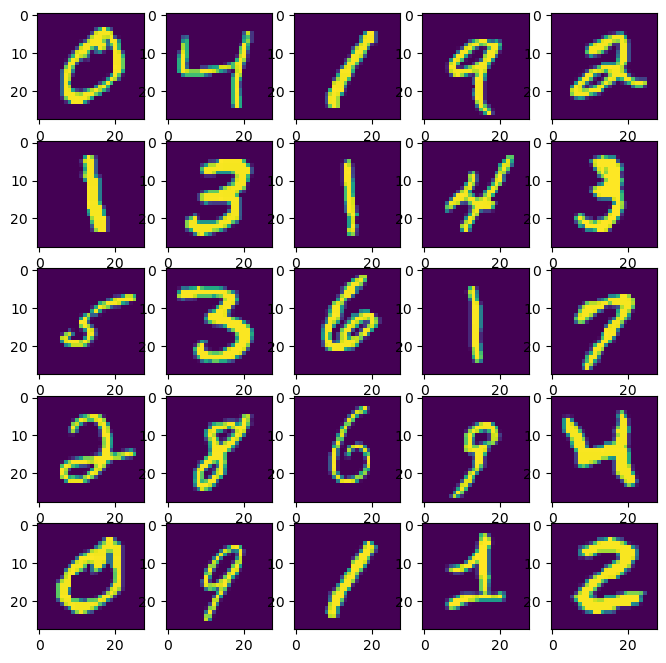

In [25]:
figure = plt.figure(figsize=(8, 8))
for i in range(1, 26):
    figure.add_subplot(5, 5, i)
    plt.imshow(x_train[i])

In [26]:
# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [27]:
# Reshape the input images to match the expected format
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [28]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 38s 95ms/step - loss: 0.4890 - accuracy: 0.8413 - val_loss: 0.1701 - val_accuracy: 0.9487
Epoch 2/10
375/375 [==============================] - 36s 96ms/step - loss: 0.1541 - accuracy: 0.9510 - val_loss: 0.1354 - val_accuracy: 0.9575
Epoch 3/10
375/375 [==============================] - 36s 95ms/step - loss: 0.1099 - accuracy: 0.9654 - val_loss: 0.0968 - val_accuracy: 0.9711
Epoch 4/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0910 - accuracy: 0.9720 - val_loss: 0.0816 - val_accuracy: 0.9742
Epoch 5/10
375/375 [==============================] - 36s 96ms/step - loss: 0.0751 - accuracy: 0.9764 - val_loss: 0.0873 - val_accuracy: 0.9729
Epoch 6/10
375/375 [==============================] - 38s 101ms/step - loss: 0.0658 - accuracy: 0.9788 - val_loss: 0.0759 - val_accuracy: 0.9770
Epoch 7/10
375/375 [==============================] - 37s 99ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0722 - val_accuracy

In [31]:
model.evaluate(
    x_test,
    y_test
)

313/313 [==============================] - 3s 9ms/step - loss: 0.0720 - accuracy: 0.9788


[0.07200989127159119, 0.9787999987602234]

313/313 [==============================] - 2s 7ms/step
The predicted number is  5


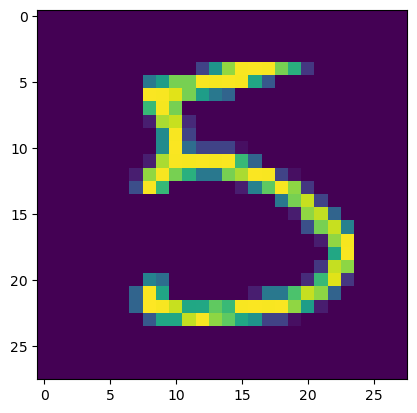

In [38]:
prediction = model.predict(x_test)
prediction = np.argmax(prediction, axis=1)
plt.imshow(x_test[15].reshape(28, 28))
print('The predicted number is  ' + str(prediction[15]))

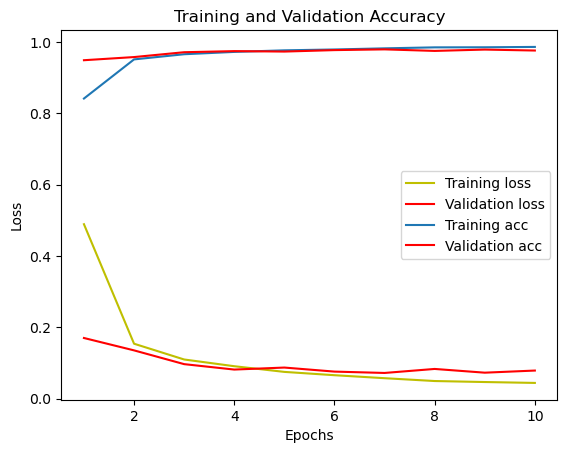

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()